### 充电视频相对非充电视频的特点

#### 一. 充电视频和普通视频相比是否普遍时长更长？

In [40]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("../data/processed/processed_videos.parquet")

# Filter to only include videos after policy date (2023-09)
df = df[df['after_policy'] == True].copy()

# Quick check
#df[['pub_datetime', 'year_month', 'charged']].head()


1. 用mean，std，max，min，median来对比充电和非充电视频的时长差异

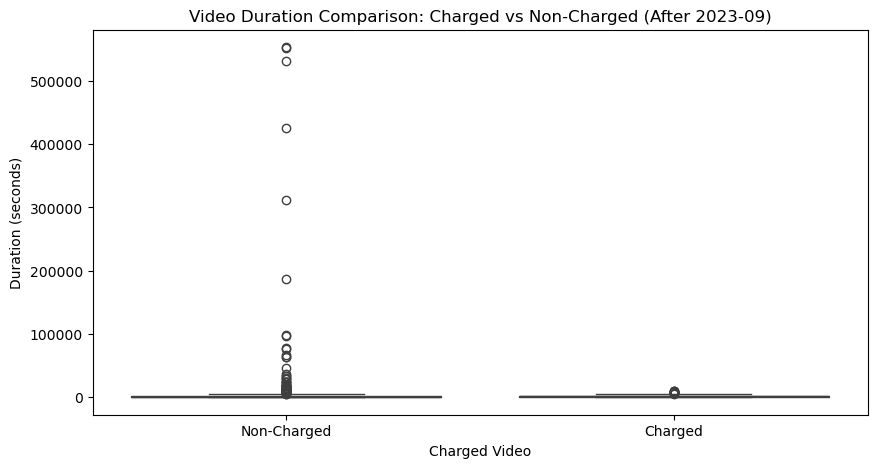

,count,mean,std,min,25%,50%,75%,max
charged,,,,,,,,
False,722.0,6804.331025,41445.453612,9.0,573.5,1084.5,2327.5,553308.0
True,121.0,2205.595041,2261.407547,83.0,501.0,1801.0,2530.0,10506.0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='charged', y='duration')
plt.title("Video Duration Comparison: Charged vs Non-Charged (After 2023-09)")
plt.xlabel("Charged Video")
plt.ylabel("Duration (seconds)")
plt.xticks([0, 1], ['Non-Charged', 'Charged'])
plt.show()

# Descriptive statistics
df.groupby('charged')['duration'].describe()

#### 二. 充电视频和普通视频相比收视率，engagement是怎样的？

1. 整体对比充电和非充电视频'like', 'favorite', 'share', 'coin', 'comment', 'danmaku'的平均值，中位数

（view的数量级过大，直接放在一起不利于可视化，可以直接对比）

/var/folders/8p/r5__m2p942xgq_lspgr2z87m0000gn/T/ipykernel_70495/3145100308.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


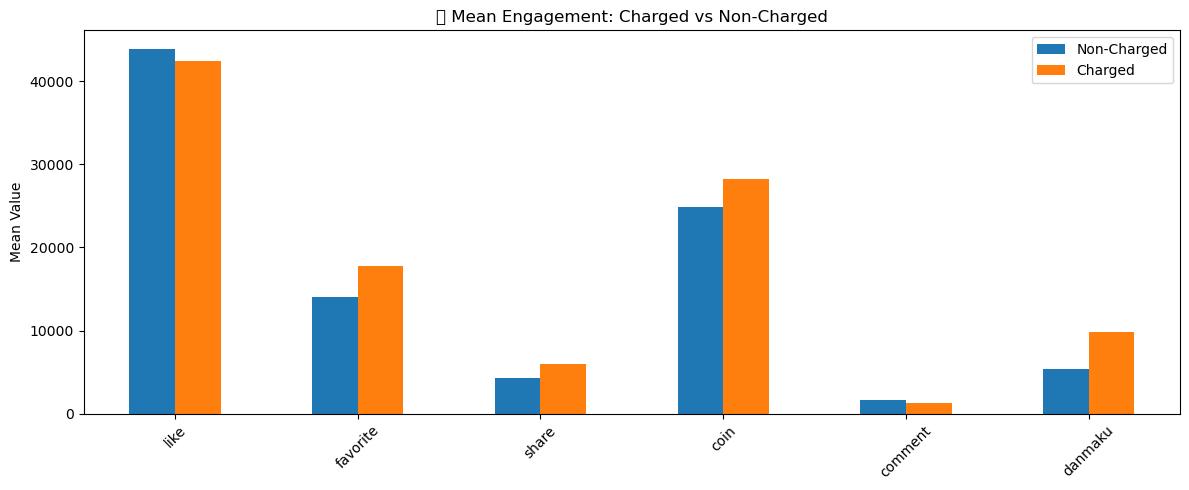

/var/folders/8p/r5__m2p942xgq_lspgr2z87m0000gn/T/ipykernel_70495/3145100308.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


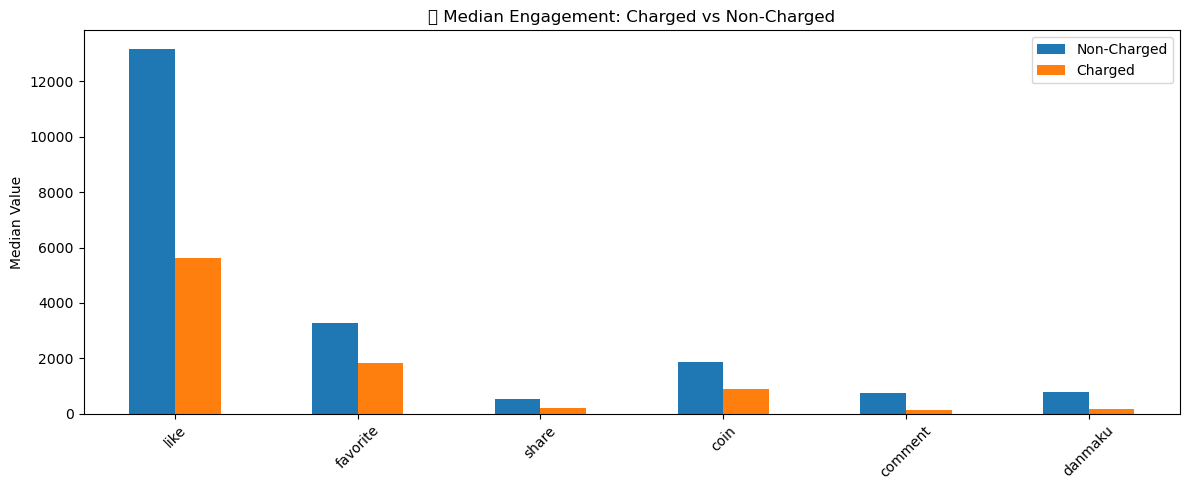

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your real engagement column list
engagement_cols = ['like', 'favorite', 'share', 'coin', 'comment', 'danmaku']

# Compute mean and median for each group (charged vs non-charged)
mean_df = df.groupby('charged')[engagement_cols].mean().T
median_df = df.groupby('charged')[engagement_cols].median().T

# Rename columns for clarity
mean_df.columns = ['Non-Charged', 'Charged']
median_df.columns = ['Non-Charged', 'Charged']

# Plot MEAN bar chart
mean_df.plot(kind='bar', figsize=(12, 5), title='📊 Mean Engagement: Charged vs Non-Charged')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MEDIAN bar chart
median_df.plot(kind='bar', figsize=(12, 5), title='📊 Median Engagement: Charged vs Non-Charged')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. view的descriptive statistics

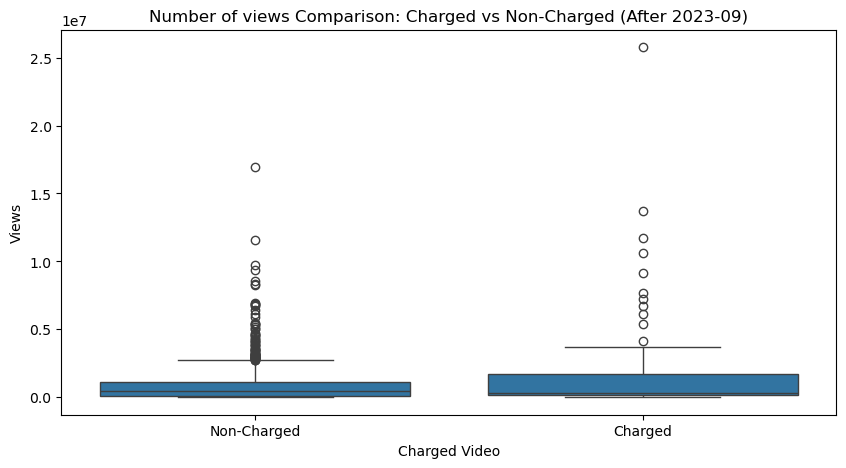

,count,mean,std,min,25%,50%,75%,max
charged,,,,,,,,
False,722.0,9.668990e+05,1.558637e+06,20.0,85858.5,428360.0,1138641.25,16920254.0
True,121.0,1.576041e+06,3.268237e+06,1609.0,180119.0,326849.0,1708407.00,25768161.0


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='charged', y='view')
plt.title("Number of views Comparison: Charged vs Non-Charged (After 2023-09)")
plt.xlabel("Charged Video")
plt.ylabel("Views")
plt.xticks([0, 1], ['Non-Charged', 'Charged'])
plt.show()

# Descriptive statistics
df.groupby('charged')['view'].describe()

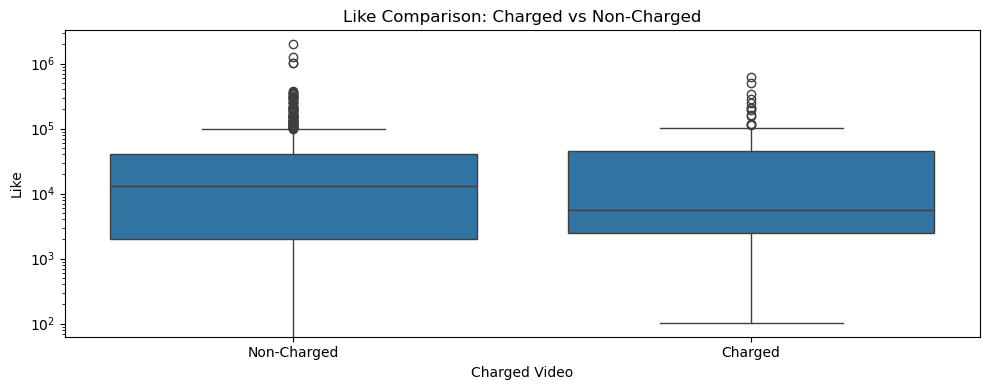

Descriptive statistics for like:
         count          mean            std    min     25%      50%       75%  \
charged                                                                         
False    722.0  43911.530471  117121.345164    0.0  2005.5  13182.5  40858.75   
True     121.0  42375.760331   91358.809003  103.0  2485.0   5621.0  45202.00   

               max  
charged             
False    1979182.0  
True      628484.0  


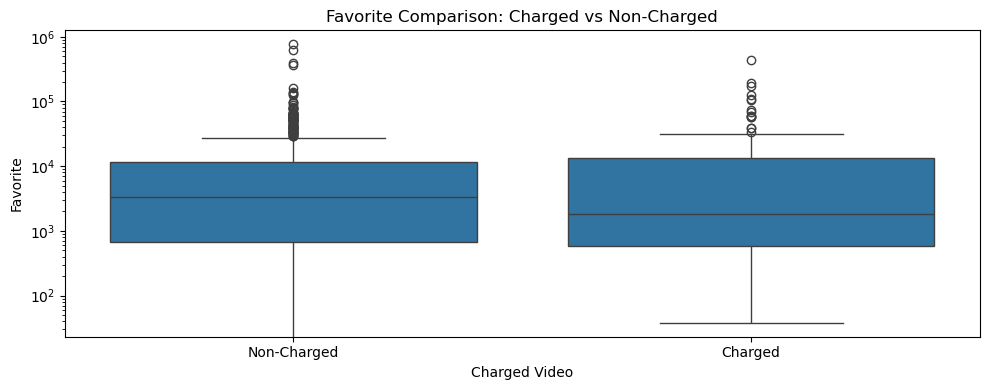

Descriptive statistics for favorite:
         count          mean           std   min    25%     50%       75%  \
charged                                                                     
False    722.0  13999.454294  45332.944269   0.0  677.5  3287.0  11580.75   
True     121.0  17796.214876  49221.134693  38.0  593.0  1840.0  13256.00   

              max  
charged            
False    766365.0  
True     431743.0  


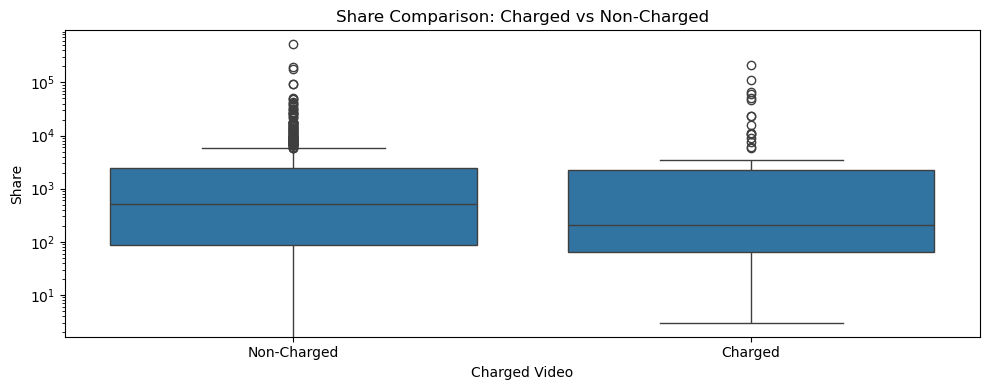

Descriptive statistics for share:
         count         mean           std  min    25%    50%     75%       max
charged                                                                       
False    722.0  4276.480609  22997.568997  0.0  88.25  524.5  2401.5  521584.0
True     121.0  6031.611570  23438.260335  3.0  64.00  207.0  2229.0  208686.0


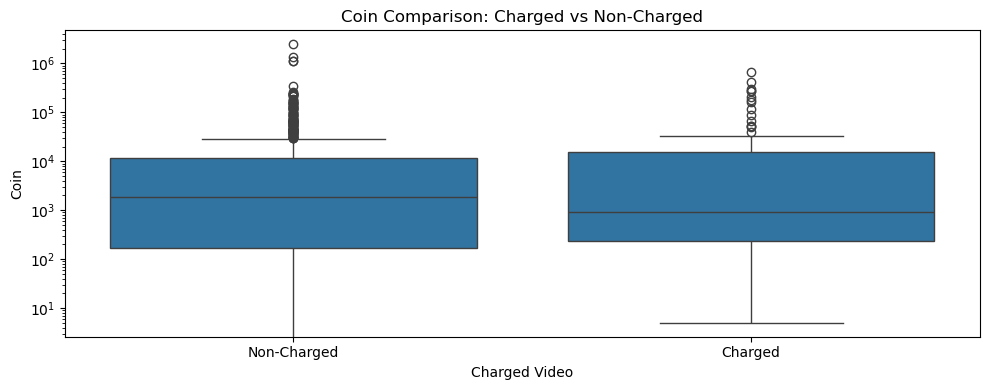

Descriptive statistics for coin:
         count          mean            std  min     25%     50%      75%  \
charged                                                                     
False    722.0  24894.819945  124462.100475  0.0  166.75  1853.0  11778.5   
True     121.0  28223.057851   86642.949612  5.0  238.00   905.0  15335.0   

               max  
charged             
False    2467638.0  
True      663219.0  


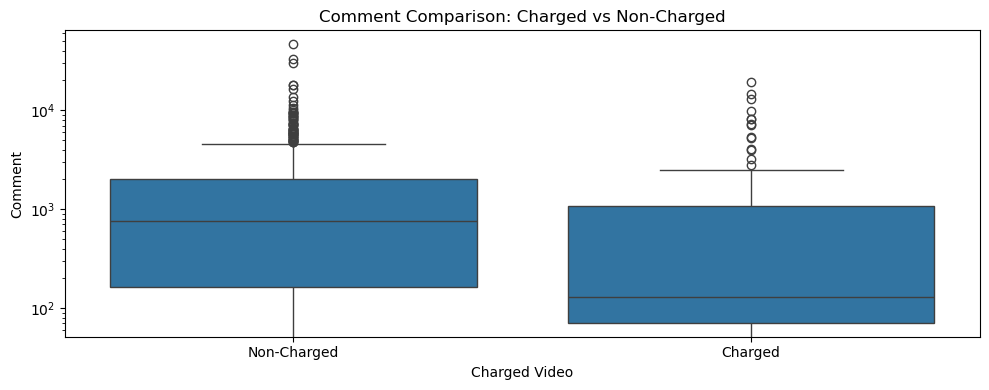

Descriptive statistics for comment:
         count         mean          std  min     25%    50%     75%      max
charged                                                                      
False    722.0  1704.743767  3231.208474  0.0  164.25  758.0  2002.5  46382.0
True     121.0  1265.545455  2964.603425  0.0   71.00  130.0  1064.0  19335.0


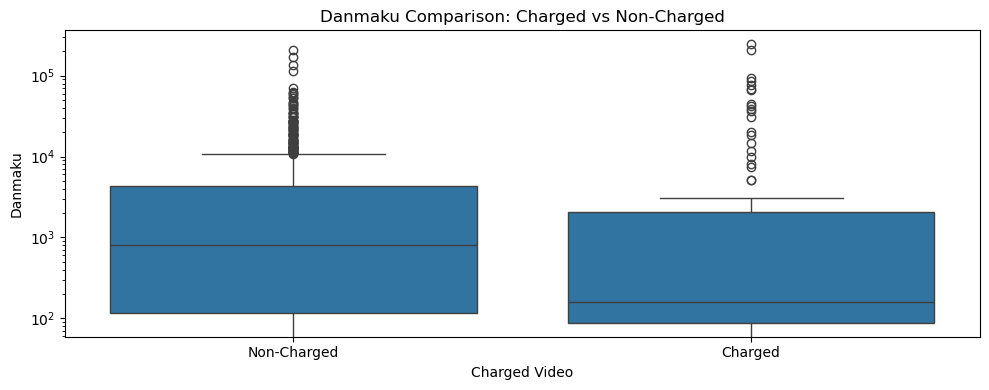

Descriptive statistics for danmaku:
         count         mean           std  min    25%    50%     75%       max
charged                                                                       
False    722.0  5378.675900  14796.013706  0.0  117.5  799.5  4353.0  208230.0
True     121.0  9779.867769  33238.436685  0.0   88.0  159.0  2041.0  244589.0


In [44]:
# 📊 Step 3: Compare raw engagement metrics (view, like, favorite, share, coin)
engagement_cols = ['like', 'favorite', 'share', 'coin', 'comment', 'danmaku']

for col in engagement_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='charged', y=col)
    plt.title(f"{col.capitalize()} Comparison: Charged vs Non-Charged")
    plt.xlabel("Charged Video")
    plt.ylabel(col.capitalize())
    plt.xticks([0, 1], ['Non-Charged', 'Charged'])
    plt.yscale('log')  # log scale helps with outliers
    plt.tight_layout()
    plt.show()
    # Descriptive statistics
    print(f"Descriptive statistics for {col}:")
    print(df.groupby('charged')[col].describe())
